In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('medical_examination.csv')

In [41]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [42]:
len(df)

70000

In [52]:
def is_overweight(row):
    # Calculate BMI
    bmi = row['weight'] / ((row['height']/100) ** 2)
    # Check if BMI is greater than 25
    return 1 if bmi > 25 else 0


In [53]:
df['overweight']= df.apply(is_overweight,axis=1)


In [54]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [14]:
df['overweight'].unique()

array([0, 1])

In [66]:
df['cholesterol']=df['cholesterol'].apply(lambda x : 0 if x==1 else 1)
df['gluc']=df['gluc'].apply(lambda x : 0 if x==1 else 1)

In [67]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


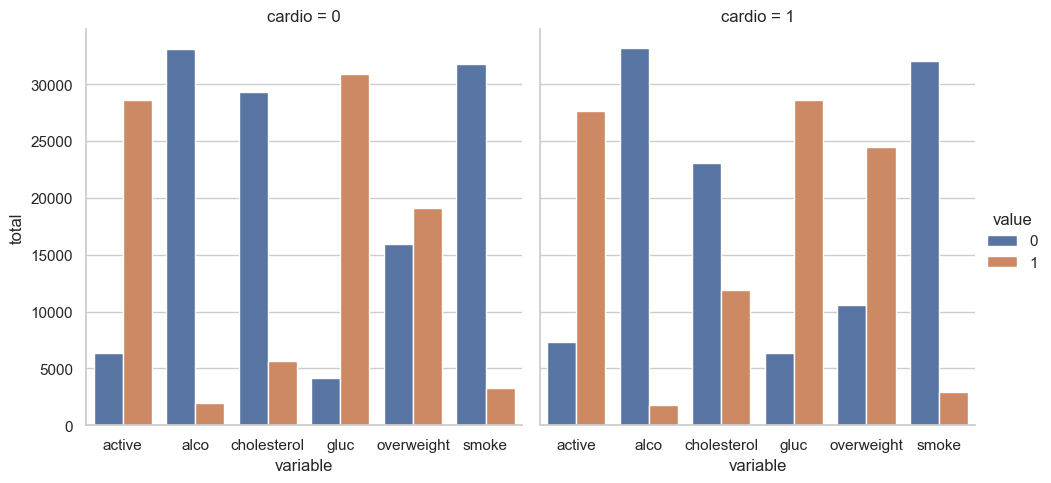

In [99]:

    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    #df_cat = None

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data = df_cat, kind='count',  x='variable', hue='value', col='cardio').set(ylabel = 'total').fig



In [100]:
df_heat = df[ 
        ( df['ap_lo'] <= df['ap_hi'] ) & 
        ( df['height'] >= df['height'].quantile(0.025) ) & 
        ( df['height'] <= df['height'].quantile(0.975) ) & 
        ( df['weight'] >= df['weight'].quantile(0.025) ) & 
        ( df['weight'] <= df['weight'].quantile(0.975) ) 
    ]

In [101]:
    corr = df_heat.corr()

In [102]:
mask = np.triu(corr)

In [111]:
fig, ax = plt.subplots()

sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)

# Show the plot
plt.show()








TypeError: cannot unpack non-iterable function object

In [ ]:

    
    # Draw the heatmap with 'sns.heatmap()'
    


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig